# Simulación del sistema de partículas en una caja con colisiones:

**Resumen**

Este proyecto presenta una simulación de partículas en movimiento dentro de una caja, donde las partículas colisionan entre sí y con las paredes de la caja. La animación muestra cómo las partículas interactúan, se mueven y cambian sus velocidades tras las colisiones. La simulación explora aspectos de la dinámica de gases y la influencia de las colisiones en la distribución de velocidades de las partículas.

**Introducción**

La simulación modela un sistema de partículas que se mueven libremente en un espacio bidimensional confinado dentro de una caja. Cada partícula tiene una velocidad inicial aleatoria, y las colisiones tanto entre partículas como con las paredes de la caja son consideradas en el modelo. La animación resultante ilustra el comportamiento dinámico del sistema, ofreciendo una visualización clara de cómo las partículas se distribuyen y cómo las colisiones afectan sus trayectorias.

**Modelo matemático**

El modelo se basa en la dinámica de partículas en un sistema cerrado con colisiones. Las posiciones y velocidades de las partículas se actualizan en función de las siguientes reglas:
- Actualización de posiciones: Las posiciones de las partículas se actualizan en cada paso de tiempo sumando sus velocidades.
- Colisiones con las paredes: Cuando una partícula toca una pared, su velocidad en la dirección correspondiente se invierte, simulando una colisión perfectamente elástica.
- Colisiones entre partículas: Las partículas que se acercan a una distancia menor que un radio de colisión intercambian sus velocidades, modelando una colisión elástica entre partículas.

Las posiciones se limitan a estar dentro de los límites de la caja, y las velocidades se ajustan en función de las colisiones con las paredes y entre partículas.

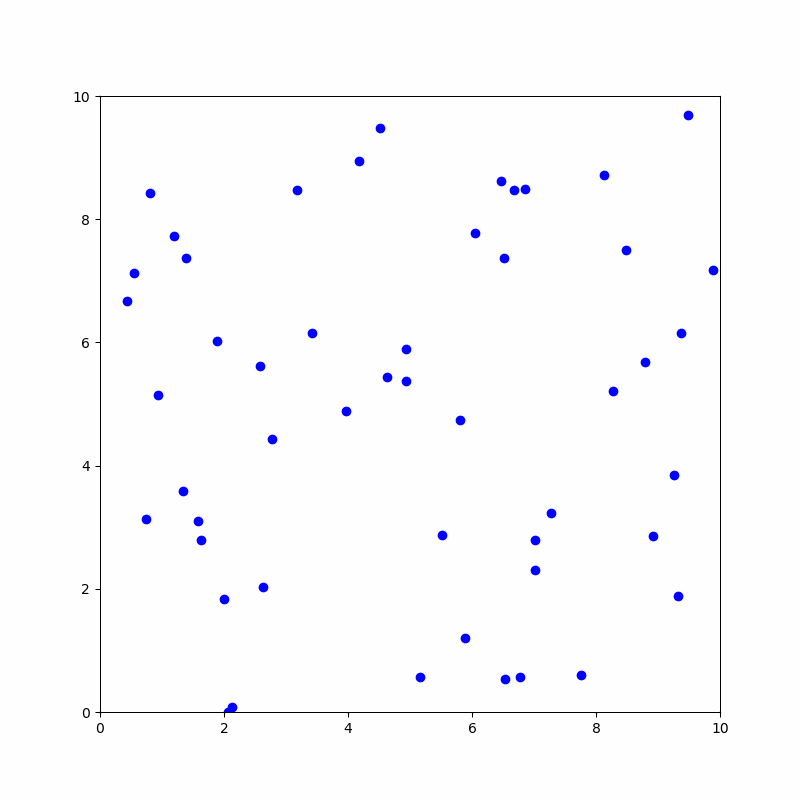

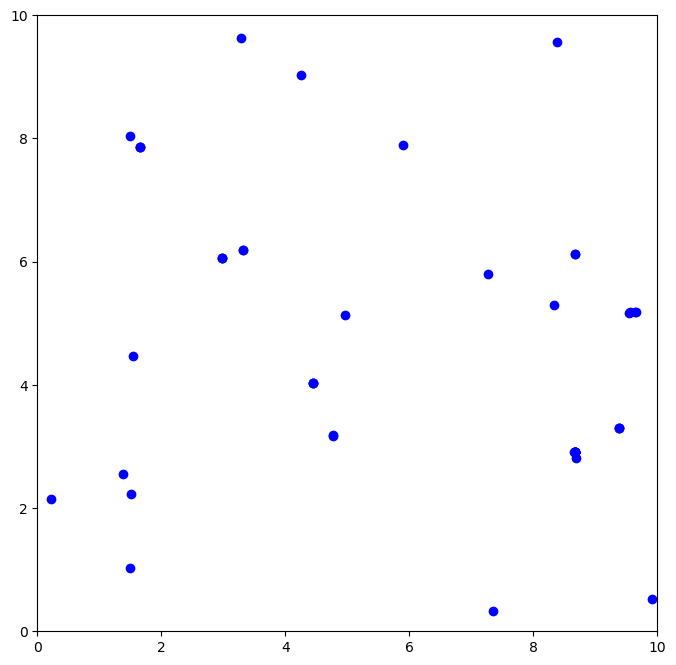

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle

# Parámetros
num_particles = 50  # Número de partículas
box_size = 10.0     # Tamaño de la caja
velocity_range = 1.0  # Rango de velocidades iniciales

# Inicializar posiciones y velocidades
positions = np.random.rand(num_particles, 2) * box_size
velocities = (np.random.rand(num_particles, 2) - 0.5) * velocity_range

# Función para actualizar la posición y la velocidad de las partículas
def update_positions(positions, velocities, box_size):
    positions += velocities
    
    # Colisiones con las paredes
    mask_x = (positions < 0) | (positions > box_size)
    velocities[mask_x] *= -1
    
    # Colisiones entre partículas
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            distance = np.linalg.norm(positions[i] - positions[j])
            if distance < 0.1:  # Radio de colisión
                velocities[i], velocities[j] = velocities[j], velocities[i]
    
    positions = np.clip(positions, 0, box_size)
    return positions, velocities

# Configuración de la visualización
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)

# Inicialización de los gráficos
particles, = ax.plot([], [], 'o', color='blue')

def init():
    particles.set_data([], [])
    return particles,

def update(frame):
    global positions, velocities
    positions, velocities = update_positions(positions, velocities, box_size)
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Crear la animación
ani = FuncAnimation(fig, update, frames=200, init_func=init, blit=True, interval=50)

# Guardar la animación como un archivo GIF
gif_path = 'particles_simulation.gif'
ani.save(gif_path, writer='pillow', fps=20)

# Mostrar el archivo GIF en el notebook
from IPython.display import Image, display
display(Image(filename=gif_path))


**Conclusión**

La simulación proporciona una representación visual dinámica de cómo las partículas se comportan en un sistema confinado. Las partículas se mueven libremente y sus trayectorias son influenciadas por las colisiones con otras partículas y con las paredes de la caja. La animación muestra cómo la distribución de velocidades y las trayectorias de las partículas cambian a lo largo del tiempo. Este modelo permite observar efectos interesantes de la dinámica de gases y proporciona una comprensión intuitiva del comportamiento de sistemas de partículas en un espacio confinado.